In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Load the new dataset
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')

# Drop the 
df = df.drop(columns=['ID', 'Fireplace', 'HouseColor', 'Garage', 'IsLuxury'])

# Preview th,e data
print("Data Shape:", df.shape)
df.head()

Data Shape: (7000, 17)


,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice
0,255614.90,566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,1,13,181861.54
1,155586.09,1472.34,1.00,2,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,1,17,50042.60
2,131050.83,550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,2,34,48400.34
3,151361.71,941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,1,14,84594.12
4,113167.61,550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,1,21,22934.60


In [26]:


# Remove rows with negative values
initial_rows = df.shape[0]
if 'PreviousSalePrice' in df.columns:
    df = df[df['PreviousSalePrice'] >= 0]
if 'Windows' in df.columns:
    df = df[df['Windows'] >= 0]
removed_rows = initial_rows - df.shape[0]
print(f"Removed {removed_rows} rows with negative values.")

# Check for Nulls
print("\nNull Values:\n", df.isnull().sum())

# Show cleaned dataframe info
print("\nCleaned Data Info:")
df.info()

Removed 78 rows with negative values.

Null Values:
 Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Floors                  0
Windows                 0
PreviousSalePrice       0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6922 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 6922 non-null   float64
 1   SquareFootage         6922 non-null   float64
 2   NumBathrooms          6922 non-null   float64
 3   NumBedrooms           6922 non-null   int64  
 4   BackyardSpace         6922 non-null   float64
 5   CrimeRat

In [64]:
# 1. Standardize the Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled_array, columns=df.columns)

# Display Descriptive Statistics for the original (unstandardized) data
print("Descriptive Statistics for All Variables (Before Standardization):\n")
display(df.describe().T.round(2))

# 3. Descriptive Statistics for Standardized Data
print("\nDescriptive Statistics (Standardized Data):")
display(X_scaled.describe().T.round(2))

Descriptive Statistics for All Variables (Before Standardization):



,count,mean,std,min,25%,50%,75%,max
Price,6922.00,308243.94,150002.90,85000.00,193197.56,280439.37,392825.24,1046675.64
SquareFootage,6922.00,1050.99,425.84,550.00,663.71,1001.08,1344.42,2874.70
NumBathrooms,6922.00,2.13,0.95,1.00,1.29,2.00,2.77,5.81
NumBedrooms,6922.00,3.01,1.02,1.00,2.00,3.00,4.00,7.00
BackyardSpace,6922.00,511.23,280.00,0.39,300.71,495.82,703.90,1631.36
CrimeRate,6922.00,31.22,18.03,0.03,17.41,30.34,43.64,99.73
SchoolRating,6922.00,6.95,1.89,0.22,5.66,7.01,8.36,10.00
AgeOfHome,6922.00,46.86,31.82,0.01,20.77,42.68,67.31,178.68
DistanceToCityCenter,6922.00,17.44,11.99,0.00,7.81,15.60,25.17,65.20
EmploymentRate,6922.00,93.71,4.51,72.05,90.62,94.01,97.41,99.90



Descriptive Statistics (Standardized Data):


,count,mean,std,min,25%,50%,75%,max
Price,6922.00,-0.00,1.00,-1.49,-0.77,-0.19,0.56,4.92
SquareFootage,6922.00,-0.00,1.00,-1.18,-0.91,-0.12,0.69,4.28
NumBathrooms,6922.00,-0.00,1.00,-1.19,-0.88,-0.14,0.66,3.85
NumBedrooms,6922.00,-0.00,1.00,-1.97,-0.99,-0.01,0.97,3.91
BackyardSpace,6922.00,0.00,1.00,-1.82,-0.75,-0.06,0.69,4.00
CrimeRate,6922.00,0.00,1.00,-1.73,-0.77,-0.05,0.69,3.80
SchoolRating,6922.00,-0.00,1.00,-3.56,-0.68,0.03,0.75,1.62
AgeOfHome,6922.00,-0.00,1.00,-1.47,-0.82,-0.13,0.64,4.14
DistanceToCityCenter,6922.00,-0.00,1.00,-1.45,-0.80,-0.15,0.64,3.98
EmploymentRate,6922.00,0.00,1.00,-4.80,-0.69,0.07,0.82,1.37


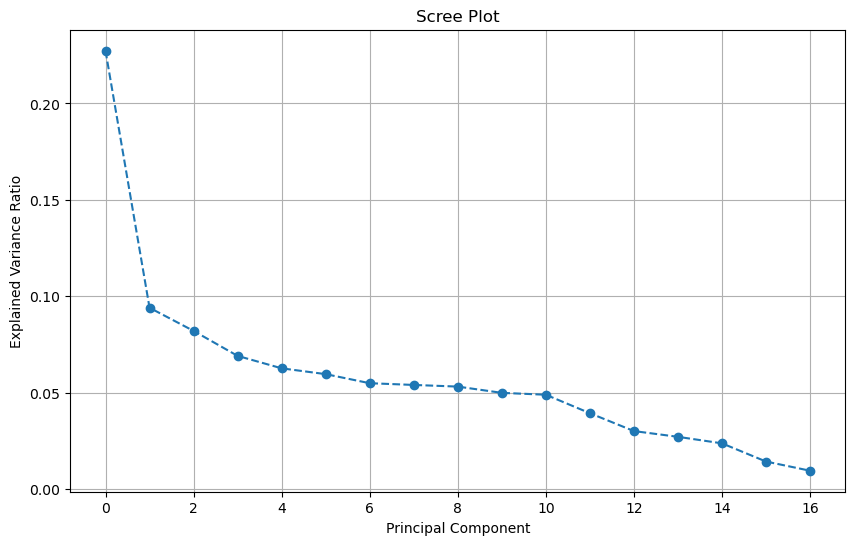


Variance of Components:
      PC  Variance  Eigenvalue
0    PC0      0.23        3.87
1    PC1      0.09        1.60
2    PC2      0.08        1.39
3    PC3      0.07        1.17
4    PC4      0.06        1.07
5    PC5      0.06        1.01
6    PC6      0.05        0.93
7    PC7      0.05        0.92
8    PC8      0.05        0.90
9    PC9      0.05        0.85
10  PC10      0.05        0.83
11  PC11      0.04        0.67
12  PC12      0.03        0.51
13  PC13      0.03        0.46
14  PC14      0.02        0.40
15  PC15      0.01        0.24
16  PC16      0.01        0.16

 Loading Matrix
                       PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8  \
Price                 0.43 -0.01 -0.18 -0.18  0.03 -0.01 -0.01 -0.02 -0.03   
SquareFootage         0.31 -0.01 -0.15 -0.18 -0.09  0.20 -0.11 -0.21  0.18   
NumBathrooms          0.27 -0.01 -0.17 -0.15 -0.12  0.21 -0.03 -0.15  0.20   
NumBedrooms           0.27 -0.00 -0.08  0.04  0.33 -0.38  0.28  0.34 -0.44   
BackyardSp

In [50]:
# 1. Fit PCA with all features.
from sklearn.decomposition import PCA


pca_full = PCA()
pca_full.fit(X_scaled)

# 2. Generate Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range( len(pca_full.explained_variance_ratio_) ),
         pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 3. Print Variance Info 
explained_variance = pd.DataFrame({
    'PC': [f'PC{i}' for i in range(len(pca_full.explained_variance_ratio_))],
    'Variance': pca_full.explained_variance_ratio_,
    'Eigenvalue': pca_full.explained_variance_
})
print("\nVariance of Components:")
print(explained_variance)



# 5. Print Loading Matrix
loading_matrix = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i}' for i in range(len(pca_full.components_))],
    index=X_scaled.columns
)
print("\n Loading Matrix")
print(loading_matrix.round(3))

In [54]:
# Transform data using PCA with components 0-5
n_components = 6 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PC columns
pc_columns = [f'PC{i}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

print(f"PCA Dataset Shape: {df_pca.shape}")


# Add Price back 
# If Price was in X_scaled, we need to get it from the original df
if 'Price' in df.columns:
    df_pca['Price'] = df['Price'].values
    
    # Split into train and test sets
    X_pca_train, X_pca_test, y_train, y_test = train_test_split(
        df_pca.drop(columns=['Price']), 
        df_pca['Price'], 
        test_size=0.2, 
        random_state=42
    )
    
    # Combine features and target for export
    train_pca_export = X_pca_train.copy()
    train_pca_export['Price'] = y_train
    train_pca_export.to_csv('train_data_pca.csv', index=False)
    
    test_pca_export = X_pca_test.copy()
    test_pca_export['Price'] = y_test
    test_pca_export.to_csv('test_data_pca.csv', index=False)
    print("\nFiles saved:")

else:
    print("\nWarning: 'Price' column not found in original dataframe.")

PCA Dataset Shape: (6922, 6)

Files saved:


In [55]:
# Use the PCA train/test sets from the previous cell
# Add Constant for Statsmodels (OLS requires an intercept column)
X_train_pca_const = sm.add_constant(X_pca_train)
X_test_pca_const = sm.add_constant(X_pca_test)

# Fit the OLS Model using PCA components
model = sm.OLS(y_train, X_train_pca_const).fit(cov_type='HC3')

# Print Summary (R-squared, Coefficients, P-values)
print(model.summary())

# Predictions
y_train_pred = model.predict(X_train_pca_const)
y_test_pred = model.predict(X_test_pca_const)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nMSE Train: {mse_train:,.2f}")
print(f"MSE Test:  {mse_test:,.2f}")

# Root Mean Squared Error (RMSE) - easier to interpret (in dollars)
print(f"RMSE Train: ${np.sqrt(mse_train):,.2f}")
print(f"RMSE Test:  ${np.sqrt(mse_test):,.2f}")

# Display Coefficients for Principal Components
print("\nCoefficients for Principal Components:")
for feature, coef in model.params.items():
    if feature == 'const':
        print(f"  {feature}: ${coef:,.2f}")
    else:
        print(f"  {feature}: {coef:,.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2234.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:16:16   Log-Likelihood:                -69491.
No. Observations:                5537   AIC:                         1.390e+05
Df Residuals:                    5530   BIC:                         1.390e+05
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.086e+05    916.396    336.788      0.0

In [57]:
from sklearn.metrics import mean_absolute_error


# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))) * 100

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"\nMAPE Train: {mape_train:,.2f}%")
print(f"MAPE Test:  {mape_test:,.2f}%")

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"\nMAE Train: ${mae_train:,.2f}")
print(f"MAE Test:  ${mae_test:,.2f}")


MAPE Train: 19.01%
MAPE Test:  19.49%

MAE Train: $53,241.72
MAE Test:  $53,178.01
